In [1]:
from scipy import optimize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from pymoo.core.problem import Problem

In [2]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.factory import get_sampling, get_crossover, get_mutation
from pymoo.optimize import minimize
#from example import MyProblem

algorithm = NSGA2(
    pop_size=40,
    n_offsprings=10,
    sampling=get_sampling("real_random"),
    crossover=get_crossover("real_sbx", prob=0.9, eta=10),
    mutation=get_mutation("real_pm", eta=18),
    eliminate_duplicates=True
)

In [3]:
P=72
M=72

# q4.1_agriculture

In [4]:
df1=pd.DataFrame()

In [5]:
a=(P-1.7)/132*24322000
b=(M-0.6)/121*26134000
temp=[]
from pymoo.core.problem import Problem
class MyProblem(Problem):
    def __init__(self):
        super().__init__(n_var=14,   
                         n_obj=3,   
                         n_constr=9,    
                         xl=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0]),     
                         xu=np.array([a,a,a,a,a,a,a,b,b,b,b,b,b,b]),   
                         )

    def _evaluate(self, x, out, *args, **kwargs):

        
        
        alpha=0.6
        belta=0.7
        f1 = -x[:, 0]*1250*2/3/6 - x[:, 1]*1250*1/3/6 - x[:, 2]*1629*2/3/3 -  x[:, 3]*1629*1/3/3-x[:, 4]*1303.4*2/3/2-x[:, 5]*1303.4*1/3/2-x[:, 6]*1250*1/3/6-x[:, 7]*1250*1/3/6-x[:, 8]*1629*1/3/3- x[:, 9]*1629*2/3/3-x[:, 10]*1303.4*1/3/2-x[:, 11]*1303.4*2/3/2-x[:, 12]*(0.3*P+12.5)*36-x[:, 13]*(0.3*M+12.8)*36
                #f2 = -(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7])/(4.97*10**7/365)-(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])/(2.65*10**6/365)-(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])/(9.61*10**6/365)
                #f3= -x[:, 12]*(0.3*P+12.5)/(10**6)-x[:, 13]*(0.3*M+12.8)/(10**6)
        f2 = -(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7]+x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9]+x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])/(4.97*10**7/365+2.65*10**6/365+9.61*10**6/365)-x[:, 13]/4109
        f3= -x[:, 12]*(0.3*P+12.5)*1.2*10**7-x[:, 13]*(0.3*M+12.8)*1.2*10**7+1.2*10**13
        f4= -2*(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])-6*(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])
        
        g1=-(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7])+(4.97*10**7/365*80)
        g8=-(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])+(2.65*10**6/365*80)
        g9=-(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])+(9.61*10**6/365*80)              
        g2 = -x[:, 12]*1.2*10**7*(0.3*P+12.5)-x[:, 13]*1.2*10**7*(0.3*M+12.8)+1.2*10**13*80
        g3 = x[:, 0]+x[:, 1]+x[:, 2]+x[:, 3]+x[:, 4]+x[:, 5]+x[:, 12]-(P-1.7)*1.8*10**5+0.24*10**7
        g4 = -x[:, 0]-x[:, 1]-x[:, 2]-x[:, 3]-x[:, 4]-x[:, 5]-x[:, 12]+(P-1.7)*1.8*10**5-2.4*10**7
        g5 = x[:, 6]+x[:, 7]+x[:, 8]+x[:, 9]+x[:, 10]+x[:, 11]+x[:, 13]+alpha*x[:, 12]-(M-0.6)*2.2*10**5+0.26*10**7
        g6 = -x[:, 6]-x[:, 7]-x[:, 8]-x[:, 9]-x[:, 10]-x[:, 11]-x[:, 13]-alpha*x[:, 12]+(M-0.6)*2.2*10**5-2.6*10**7
        g7 = -0.6*x[:, 13]+4.1*10**3*80
        # todo
        out["F"] = np.column_stack([f1, f2,f3,f4])
        out["G"] = np.column_stack([g1, g2, g3, g4, g5, g6,g7,g8,g9])
        
res = minimize(MyProblem(),
    algorithm,
                seed=1,
                   termination=('n_gen', 1000))
answer=res.X[:1].squeeze().tolist()
answer=list(res.X[:1].squeeze())
print(answer)
temp.append(answer[0]+answer[1]+answer[6]+answer[7])
temp.append(answer[2]+answer[3]+answer[8]+answer[9])
temp.append(answer[4]+answer[5]+answer[10]+answer[11])
temp.append(answer[12]+answer[13])
df1['original']=temp

[3988126.588599565, 991622.3695795063, 180952.50216672313, 1422954.8684500104, 2642804.505366185, 668437.8108980652, 4294588.860522245, 1799288.7716875772, 92369.98147407196, 266643.6305800274, 2953178.7691057, 990999.2649051892, 347706.37715001963, 2448179.6752975034]


In [6]:
a=(P-1.7)/132*24322000
b=(M-0.6)/121*26134000
change=0.8
temp=[]
from pymoo.core.problem import Problem
class MyProblem(Problem):
    def __init__(self):
       
        super().__init__(n_var=14,   
                         n_obj=3,  
                         n_constr=9,    
                         xl=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0]),     
                         xu=np.array([a,a,a,a,a,a,a,b,b,b,b,b,b,b]),   
                         )

    def _evaluate(self, x, out, *args, **kwargs):

       
        
        alpha=0.6
        belta=0.7
        f1 = -x[:, 0]*1250*2/3/6 - x[:, 1]*1250*1/3/6 - x[:, 2]*1629*2/3/3 -  x[:, 3]*1629*1/3/3-x[:, 4]*1303.4*2/3/2-x[:, 5]*1303.4*1/3/2-x[:, 6]*1250*1/3/6-x[:, 7]*1250*1/3/6-x[:, 8]*1629*1/3/3- x[:, 9]*1629*2/3/3-x[:, 10]*1303.4*1/3/2-x[:, 11]*1303.4*2/3/2-x[:, 12]*(0.3*P+12.5)*36-x[:, 13]*(0.3*M+12.8)*36
                #f2 = -(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7])/(4.97*10**7/365)-(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])/(2.65*10**6/365)-(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])/(9.61*10**6/365)
                #f3= -x[:, 12]*(0.3*P+12.5)/(10**6)-x[:, 13]*(0.3*M+12.8)/(10**6)
        f2 = -(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7]+x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9]+x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])/(4.97*10**7*change/365+2.65*10**6/365+9.61*10**6/365)-x[:, 13]/4109
        f3= -x[:, 12]*(0.3*P+12.5)*1.2*10**7-x[:, 13]*(0.3*M+12.8)*1.2*10**7+1.2*10**13
        f4= -2*(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])-6*(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])
        
        g1=-(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7])+(4.97*10**7*change/365*80)
        g8=-(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])+(2.65*10**6/365*80)
        g9=-(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])+(9.61*10**6/365*80)              
        g2 = -x[:, 12]*1.2*10**7*(0.3*P+12.5)-x[:, 13]*1.2*10**7*(0.3*M+12.8)+1.2*10**13*80
        g3 = x[:, 0]+x[:, 1]+x[:, 2]+x[:, 3]+x[:, 4]+x[:, 5]+x[:, 12]-(P-1.7)*1.8*10**5+0.24*10**7
        g4 = -x[:, 0]-x[:, 1]-x[:, 2]-x[:, 3]-x[:, 4]-x[:, 5]-x[:, 12]+(P-1.7)*1.8*10**5-2.4*10**7
        g5 = x[:, 6]+x[:, 7]+x[:, 8]+x[:, 9]+x[:, 10]+x[:, 11]+x[:, 13]+alpha*x[:, 12]-(M-0.6)*2.2*10**5+0.26*10**7
        g6 = -x[:, 6]-x[:, 7]-x[:, 8]-x[:, 9]-x[:, 10]-x[:, 11]-x[:, 13]-alpha*x[:, 12]+(M-0.6)*2.2*10**5-2.6*10**7
        g7 = -0.6*x[:, 13]+4.1*10**3*80
        # todo
        out["F"] = np.column_stack([f1, f2,f3,f4])
        out["G"] = np.column_stack([g1, g2, g3, g4, g5, g6,g7,g8,g9])
        
res = minimize(MyProblem(),
    algorithm,
                seed=1,
                   termination=('n_gen', 1000))
answer=res.X[:1].squeeze().tolist()
answer=list(res.X[:1].squeeze())
print(answer)
temp.append(answer[0]+answer[1]+answer[6]+answer[7])
temp.append(answer[2]+answer[3]+answer[8]+answer[9])
temp.append(answer[4]+answer[5]+answer[10]+answer[11])
temp.append(answer[12]+answer[13])
df1['shrink']=temp

[4264184.440570265, 1037064.5825529251, 205855.05947588477, 109229.69406916405, 1020904.3271522843, 2952338.9663396105, 718364.852645577, 3194807.502125675, 26647.205697922647, 921592.9119833683, 154613.9031617511, 1188233.5693915635, 14152.470442031277, 6519059.335262834]


In [7]:
a=(P-1.7)/132*24322000
b=(M-0.6)/121*26134000
change=1.2
temp=[]
from pymoo.core.problem import Problem
class MyProblem(Problem):
    def __init__(self):
        
        super().__init__(n_var=14,   
                         n_obj=3,   
                         n_constr=9,    
                         xl=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0]),     
                         xu=np.array([a,a,a,a,a,a,a,b,b,b,b,b,b,b]),   
                         )

    def _evaluate(self, x, out, *args, **kwargs):

        
        
        alpha=0.6
        belta=0.7
        f1 = -x[:, 0]*1250*2/3/6 - x[:, 1]*1250*1/3/6 - x[:, 2]*1629*2/3/3 -  x[:, 3]*1629*1/3/3-x[:, 4]*1303.4*2/3/2-x[:, 5]*1303.4*1/3/2-x[:, 6]*1250*1/3/6-x[:, 7]*1250*1/3/6-x[:, 8]*1629*1/3/3- x[:, 9]*1629*2/3/3-x[:, 10]*1303.4*1/3/2-x[:, 11]*1303.4*2/3/2-x[:, 12]*(0.3*P+12.5)*36-x[:, 13]*(0.3*M+12.8)*36
                #f2 = -(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7])/(4.97*10**7/365)-(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])/(2.65*10**6/365)-(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])/(9.61*10**6/365)
                #f3= -x[:, 12]*(0.3*P+12.5)/(10**6)-x[:, 13]*(0.3*M+12.8)/(10**6)
        f2 = -(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7]+x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9]+x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])/(4.97*10**7*change/365+2.65*10**6/365+9.61*10**6/365)-x[:, 13]/4109
        f3= -x[:, 12]*(0.3*P+12.5)*1.2*10**7-x[:, 13]*(0.3*M+12.8)*1.2*10**7+1.2*10**13
        f4= -2*(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])-6*(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])
       
        g1=-(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7])+(4.97*10**7*change/365*80)
        g8=-(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])+(2.65*10**6/365*80)
        g9=-(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])+(9.61*10**6/365*80)              
        g2 = -x[:, 12]*1.2*10**7*(0.3*P+12.5)-x[:, 13]*1.2*10**7*(0.3*M+12.8)+1.2*10**13*80
        g3 = x[:, 0]+x[:, 1]+x[:, 2]+x[:, 3]+x[:, 4]+x[:, 5]+x[:, 12]-(P-1.7)*1.8*10**5+0.24*10**7
        g4 = -x[:, 0]-x[:, 1]-x[:, 2]-x[:, 3]-x[:, 4]-x[:, 5]-x[:, 12]+(P-1.7)*1.8*10**5-2.4*10**7
        g5 = x[:, 6]+x[:, 7]+x[:, 8]+x[:, 9]+x[:, 10]+x[:, 11]+x[:, 13]+alpha*x[:, 12]-(M-0.6)*2.2*10**5+0.26*10**7
        g6 = -x[:, 6]-x[:, 7]-x[:, 8]-x[:, 9]-x[:, 10]-x[:, 11]-x[:, 13]-alpha*x[:, 12]+(M-0.6)*2.2*10**5-2.6*10**7
        g7 = -0.6*x[:, 13]+4.1*10**3*80
        # todo
        out["F"] = np.column_stack([f1, f2,f3,f4])
        out["G"] = np.column_stack([g1, g2, g3, g4, g5, g6,g7,g8,g9])
        
res = minimize(MyProblem(),
    algorithm,
                seed=1,
                   termination=('n_gen', 1000))
answer=res.X[:1].squeeze().tolist()
answer=list(res.X[:1].squeeze())
print(answer)
temp.append(answer[0]+answer[1]+answer[6]+answer[7])
temp.append(answer[2]+answer[3]+answer[8]+answer[9])
temp.append(answer[4]+answer[5]+answer[10]+answer[11])
temp.append(answer[12]+answer[13])
df1['growth']=temp

[6333295.335101138, 1435224.497739608, 8487.603376086065, 514407.37786640116, 1351054.6732526647, 535162.3973338576, 3228530.5445247414, 2138248.7841407275, 78815.08230650517, 128544.55229360102, 3307627.64530988, 1770127.3959439215, 40164.59668615954, 2416099.2879909645]


In [8]:
df1.index=['agriculture','industry','residence','electricity']
df1

,original,shrink,growth
agriculture,1.107363e+07,9.214421e+06,1.313530e+07
industry,1.962921e+06,1.263325e+06,7.302546e+05
residence,7.255420e+06,5.316091e+06,6.963972e+06
electricity,2.795886e+06,6.533212e+06,2.456264e+06


# q4.1_industry

In [9]:
df2=pd.DataFrame()

In [10]:
a=(P-1.7)/132*24322000
b=(M-0.6)/121*26134000
temp=[]
from pymoo.core.problem import Problem
class MyProblem(Problem):
    def __init__(self):
       
        super().__init__(n_var=14,  
                         n_obj=3,  
                         n_constr=9,    
                         xl=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0]),    
                         xu=np.array([a,a,a,a,a,a,a,b,b,b,b,b,b,b]),   
                         )

    def _evaluate(self, x, out, *args, **kwargs):

        
        
        alpha=0.6
        belta=0.7
        f1 = -x[:, 0]*1250*2/3/6 - x[:, 1]*1250*1/3/6 - x[:, 2]*1629*2/3/3 -  x[:, 3]*1629*1/3/3-x[:, 4]*1303.4*2/3/2-x[:, 5]*1303.4*1/3/2-x[:, 6]*1250*1/3/6-x[:, 7]*1250*1/3/6-x[:, 8]*1629*1/3/3- x[:, 9]*1629*2/3/3-x[:, 10]*1303.4*1/3/2-x[:, 11]*1303.4*2/3/2-x[:, 12]*(0.3*P+12.5)*36-x[:, 13]*(0.3*M+12.8)*36
                #f2 = -(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7])/(4.97*10**7/365)-(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])/(2.65*10**6/365)-(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])/(9.61*10**6/365)
                #f3= -x[:, 12]*(0.3*P+12.5)/(10**6)-x[:, 13]*(0.3*M+12.8)/(10**6)
        f2 = -(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7]+x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9]+x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])/(4.97*10**7/365+2.65*10**6/365+9.61*10**6/365)-x[:, 13]/4109
        f3= -x[:, 12]*(0.3*P+12.5)*1.2*10**7-x[:, 13]*(0.3*M+12.8)*1.2*10**7+1.2*10**13
        f4= -2*(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])-6*(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])
       
        g1=-(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7])+(4.97*10**7/365*80)
        g8=-(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])+(2.65*10**6/365*80)
        g9=-(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])+(9.61*10**6/365*80)              
        g2 = -x[:, 12]*1.2*10**7*(0.3*P+12.5)-x[:, 13]*1.2*10**7*(0.3*M+12.8)+1.2*10**13*80
        g3 = x[:, 0]+x[:, 1]+x[:, 2]+x[:, 3]+x[:, 4]+x[:, 5]+x[:, 12]-(P-1.7)*1.8*10**5+0.24*10**7
        g4 = -x[:, 0]-x[:, 1]-x[:, 2]-x[:, 3]-x[:, 4]-x[:, 5]-x[:, 12]+(P-1.7)*1.8*10**5-2.4*10**7
        g5 = x[:, 6]+x[:, 7]+x[:, 8]+x[:, 9]+x[:, 10]+x[:, 11]+x[:, 13]+alpha*x[:, 12]-(M-0.6)*2.2*10**5+0.26*10**7
        g6 = -x[:, 6]-x[:, 7]-x[:, 8]-x[:, 9]-x[:, 10]-x[:, 11]-x[:, 13]-alpha*x[:, 12]+(M-0.6)*2.2*10**5-2.6*10**7
        g7 = -0.6*x[:, 13]+4.1*10**3*80
        # todo
        out["F"] = np.column_stack([f1, f2,f3,f4])
        out["G"] = np.column_stack([g1, g2, g3, g4, g5, g6,g7,g8,g9])
        
res = minimize(MyProblem(),
    algorithm,
                seed=1,
                   termination=('n_gen', 1000))
answer=res.X[:1].squeeze().tolist()
answer=list(res.X[:1].squeeze())
print(answer)
temp.append(answer[0]+answer[1]+answer[6]+answer[7])
temp.append(answer[2]+answer[3]+answer[8]+answer[9])
temp.append(answer[4]+answer[5]+answer[10]+answer[11])
temp.append(answer[12]+answer[13])
df2['original']=temp

[3988126.588599565, 991622.3695795063, 180952.50216672313, 1422954.8684500104, 2642804.505366185, 668437.8108980652, 4294588.860522245, 1799288.7716875772, 92369.98147407196, 266643.6305800274, 2953178.7691057, 990999.2649051892, 347706.37715001963, 2448179.6752975034]


In [11]:
a=(P-1.7)/132*24322000
b=(M-0.6)/121*26134000
change=0.8
temp=[]
from pymoo.core.problem import Problem
class MyProblem(Problem):
    def __init__(self):
       
        super().__init__(n_var=14,  
                         n_obj=3,   
                         n_constr=9,    
                         xl=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0]),     
                         xu=np.array([a,a,a,a,a,a,a,b,b,b,b,b,b,b]),   
                         )

    def _evaluate(self, x, out, *args, **kwargs):

       
        
        alpha=0.6
        belta=0.7
        f1 = -x[:, 0]*1250*2/3/6 - x[:, 1]*1250*1/3/6 - x[:, 2]*1629*2/3/3 -  x[:, 3]*1629*1/3/3-x[:, 4]*1303.4*2/3/2-x[:, 5]*1303.4*1/3/2-x[:, 6]*1250*1/3/6-x[:, 7]*1250*1/3/6-x[:, 8]*1629*1/3/3- x[:, 9]*1629*2/3/3-x[:, 10]*1303.4*1/3/2-x[:, 11]*1303.4*2/3/2-x[:, 12]*(0.3*P+12.5)*36-x[:, 13]*(0.3*M+12.8)*36
                #f2 = -(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7])/(4.97*10**7/365)-(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])/(2.65*10**6/365)-(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])/(9.61*10**6/365)
                #f3= -x[:, 12]*(0.3*P+12.5)/(10**6)-x[:, 13]*(0.3*M+12.8)/(10**6)
        f2 = -(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7]+x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9]+x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])/(4.97*10**7/365+2.65*10**6*change/365+9.61*10**6/365)-x[:, 13]/4109
        f3= -x[:, 12]*(0.3*P+12.5)*1.2*10**7-x[:, 13]*(0.3*M+12.8)*1.2*10**7+1.2*10**13
        f4= -2*(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])-6*(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])
       
        g1=-(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7])+(4.97*10**7/365*80)
        g8=-(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])+(2.65*10**6*change/365*80)
        g9=-(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])+(9.61*10**6/365*80)              
        g2 = -x[:, 12]*1.2*10**7*(0.3*P+12.5)-x[:, 13]*1.2*10**7*(0.3*M+12.8)+1.2*10**13*80
        g3 = x[:, 0]+x[:, 1]+x[:, 2]+x[:, 3]+x[:, 4]+x[:, 5]+x[:, 12]-(P-1.7)*1.8*10**5+0.24*10**7
        g4 = -x[:, 0]-x[:, 1]-x[:, 2]-x[:, 3]-x[:, 4]-x[:, 5]-x[:, 12]+(P-1.7)*1.8*10**5-2.4*10**7
        g5 = x[:, 6]+x[:, 7]+x[:, 8]+x[:, 9]+x[:, 10]+x[:, 11]+x[:, 13]+alpha*x[:, 12]-(M-0.6)*2.2*10**5+0.26*10**7
        g6 = -x[:, 6]-x[:, 7]-x[:, 8]-x[:, 9]-x[:, 10]-x[:, 11]-x[:, 13]-alpha*x[:, 12]+(M-0.6)*2.2*10**5-2.6*10**7
        g7 = -0.6*x[:, 13]+4.1*10**3*80
       
        out["F"] = np.column_stack([f1, f2,f3,f4])
        out["G"] = np.column_stack([g1, g2, g3, g4, g5, g6,g7,g8,g9])
        
res = minimize(MyProblem(),
    algorithm,
                seed=1,
                   termination=('n_gen', 1000))
answer=res.X[:1].squeeze().tolist()
answer=list(res.X[:1].squeeze())
print(answer)
temp.append(answer[0]+answer[1]+answer[6]+answer[7])
temp.append(answer[2]+answer[3]+answer[8]+answer[9])
temp.append(answer[4]+answer[5]+answer[10]+answer[11])
temp.append(answer[12]+answer[13])
df2['shrink']=temp

[3554168.450442751, 1449358.9823692779, 68053.91894268809, 738595.7508466712, 1203340.5848130859, 2486916.2137697674, 4403681.798382584, 1924803.2794319205, 151127.2886222341, 276188.1120051488, 2077189.3432660531, 1690982.2941409915, 511156.9701696563, 2103092.896049197]


In [12]:
a=(P-1.7)/132*24322000
b=(M-0.6)/121*26134000
change=3
temp=[]
from pymoo.core.problem import Problem
class MyProblem(Problem):
    def __init__(self):
        
        super().__init__(n_var=14,   
                         n_obj=3,   
                         n_constr=9,    
                         xl=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0]),     
                         xu=np.array([a,a,a,a,a,a,a,b,b,b,b,b,b,b]),   
                         )

    def _evaluate(self, x, out, *args, **kwargs):

        
        
        alpha=0.6
        belta=0.7
        f1 = -x[:, 0]*1250*2/3/6 - x[:, 1]*1250*1/3/6 - x[:, 2]*1629*2/3/3 -  x[:, 3]*1629*1/3/3-x[:, 4]*1303.4*2/3/2-x[:, 5]*1303.4*1/3/2-x[:, 6]*1250*1/3/6-x[:, 7]*1250*1/3/6-x[:, 8]*1629*1/3/3- x[:, 9]*1629*2/3/3-x[:, 10]*1303.4*1/3/2-x[:, 11]*1303.4*2/3/2-x[:, 12]*(0.3*P+12.5)*36-x[:, 13]*(0.3*M+12.8)*36
                #f2 = -(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7])/(4.97*10**7/365)-(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])/(2.65*10**6/365)-(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])/(9.61*10**6/365)
                #f3= -x[:, 12]*(0.3*P+12.5)/(10**6)-x[:, 13]*(0.3*M+12.8)/(10**6)
        f2 = -(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7]+x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9]+x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])/(4.97*10**7/365+2.65*10**6*change/365+9.61*10**6/365)-x[:, 13]/4109
        f3= -x[:, 12]*(0.3*P+12.5)*1.2*10**7-x[:, 13]*(0.3*M+12.8)*1.2*10**7+1.2*10**13
        f4= -2*(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])-6*(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])
        # 定义约束条件
        g1=-(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7])+(4.97*10**7/365*80)
        g8=-(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])+(2.65*10**6*change/365*80)
        g9=-(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])+(9.61*10**6/365*80)              
        g2 = -x[:, 12]*1.2*10**7*(0.3*P+12.5)-x[:, 13]*1.2*10**7*(0.3*M+12.8)+1.2*10**13*80
        g3 = x[:, 0]+x[:, 1]+x[:, 2]+x[:, 3]+x[:, 4]+x[:, 5]+x[:, 12]-(P-1.7)*1.8*10**5+0.24*10**7
        g4 = -x[:, 0]-x[:, 1]-x[:, 2]-x[:, 3]-x[:, 4]-x[:, 5]-x[:, 12]+(P-1.7)*1.8*10**5-2.4*10**7
        g5 = x[:, 6]+x[:, 7]+x[:, 8]+x[:, 9]+x[:, 10]+x[:, 11]+x[:, 13]+alpha*x[:, 12]-(M-0.6)*2.2*10**5+0.26*10**7
        g6 = -x[:, 6]-x[:, 7]-x[:, 8]-x[:, 9]-x[:, 10]-x[:, 11]-x[:, 13]-alpha*x[:, 12]+(M-0.6)*2.2*10**5-2.6*10**7
        g7 = -0.6*x[:, 13]+4.1*10**3*80
        # todo
        out["F"] = np.column_stack([f1, f2,f3,f4])
        out["G"] = np.column_stack([g1, g2, g3, g4, g5, g6,g7,g8,g9])
        
res = minimize(MyProblem(),
    algorithm,
                seed=1,
                   termination=('n_gen', 1000))
answer=res.X[:1].squeeze().tolist()
answer=list(res.X[:1].squeeze())
print(answer)
temp.append(answer[0]+answer[1]+answer[6]+answer[7])
temp.append(answer[2]+answer[3]+answer[8]+answer[9])
temp.append(answer[4]+answer[5]+answer[10]+answer[11])
temp.append(answer[12]+answer[13])
df2['growth']=temp

[3754709.1999396463, 980347.7847947124, 1284328.0407747945, 247992.48781235708, 3017665.4928436945, 813433.2875221743, 3909434.3417932983, 2276314.54838521, 30482.698311957865, 658938.7603926478, 2364087.0001188703, 1270381.5381864784, 23496.13422300246, 2435082.1251047594]


In [13]:
df2.index=['agriculture','industry','residence','electricity']
df2

,original,shrink,growth
agriculture,1.107363e+07,1.133201e+07,1.092081e+07
industry,1.962921e+06,1.233965e+06,2.221742e+06
residence,7.255420e+06,7.458428e+06,7.465567e+06
electricity,2.795886e+06,2.614250e+06,2.458578e+06


# q4.1_residence

In [14]:
df3=pd.DataFrame()

In [15]:
a=(P-1.7)/132*24322000
b=(M-0.6)/121*26134000
temp=[]
from pymoo.core.problem import Problem
class MyProblem(Problem):
    def __init__(self):
        
        super().__init__(n_var=14,   
                         n_obj=3,   
                         n_constr=9,    
                         xl=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0]),    
                         xu=np.array([a,a,a,a,a,a,a,b,b,b,b,b,b,b]),   
                         )

    def _evaluate(self, x, out, *args, **kwargs):

        
        
        alpha=0.6
        belta=0.7
        f1 = -x[:, 0]*1250*2/3/6 - x[:, 1]*1250*1/3/6 - x[:, 2]*1629*2/3/3 -  x[:, 3]*1629*1/3/3-x[:, 4]*1303.4*2/3/2-x[:, 5]*1303.4*1/3/2-x[:, 6]*1250*1/3/6-x[:, 7]*1250*1/3/6-x[:, 8]*1629*1/3/3- x[:, 9]*1629*2/3/3-x[:, 10]*1303.4*1/3/2-x[:, 11]*1303.4*2/3/2-x[:, 12]*(0.3*P+12.5)*36-x[:, 13]*(0.3*M+12.8)*36
                #f2 = -(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7])/(4.97*10**7/365)-(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])/(2.65*10**6/365)-(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])/(9.61*10**6/365)
                #f3= -x[:, 12]*(0.3*P+12.5)/(10**6)-x[:, 13]*(0.3*M+12.8)/(10**6)
        f2 = -(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7]+x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9]+x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])/(4.97*10**7/365+2.65*10**6/365+9.61*10**6/365)-x[:, 13]/4109
        f3= -x[:, 12]*(0.3*P+12.5)*1.2*10**7-x[:, 13]*(0.3*M+12.8)*1.2*10**7+1.2*10**13
        f4= -2*(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])-6*(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])
        
        g1=-(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7])+(4.97*10**7/365*80)
        g8=-(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])+(2.65*10**6/365*80)
        g9=-(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])+(9.61*10**6/365*80)              
        g2 = -x[:, 12]*1.2*10**7*(0.3*P+12.5)-x[:, 13]*1.2*10**7*(0.3*M+12.8)+1.2*10**13*80
        g3 = x[:, 0]+x[:, 1]+x[:, 2]+x[:, 3]+x[:, 4]+x[:, 5]+x[:, 12]-(P-1.7)*1.8*10**5+0.24*10**7
        g4 = -x[:, 0]-x[:, 1]-x[:, 2]-x[:, 3]-x[:, 4]-x[:, 5]-x[:, 12]+(P-1.7)*1.8*10**5-2.4*10**7
        g5 = x[:, 6]+x[:, 7]+x[:, 8]+x[:, 9]+x[:, 10]+x[:, 11]+x[:, 13]+alpha*x[:, 12]-(M-0.6)*2.2*10**5+0.26*10**7
        g6 = -x[:, 6]-x[:, 7]-x[:, 8]-x[:, 9]-x[:, 10]-x[:, 11]-x[:, 13]-alpha*x[:, 12]+(M-0.6)*2.2*10**5-2.6*10**7
        g7 = -0.6*x[:, 13]+4.1*10**3*80
        # todo
        out["F"] = np.column_stack([f1, f2,f3,f4])
        out["G"] = np.column_stack([g1, g2, g3, g4, g5, g6,g7,g8,g9])
        
res = minimize(MyProblem(),
    algorithm,
                seed=1,
                   termination=('n_gen', 1000))
answer=res.X[:1].squeeze().tolist()
answer=list(res.X[:1].squeeze())
print(answer)
temp.append(answer[0]+answer[1]+answer[6]+answer[7])
temp.append(answer[2]+answer[3]+answer[8]+answer[9])
temp.append(answer[4]+answer[5]+answer[10]+answer[11])
temp.append(answer[12]+answer[13])
df3['original']=temp

[3988126.588599565, 991622.3695795063, 180952.50216672313, 1422954.8684500104, 2642804.505366185, 668437.8108980652, 4294588.860522245, 1799288.7716875772, 92369.98147407196, 266643.6305800274, 2953178.7691057, 990999.2649051892, 347706.37715001963, 2448179.6752975034]


In [16]:
a=(P-1.7)/132*24322000
b=(M-0.6)/121*26134000
change=0.8
temp=[]
from pymoo.core.problem import Problem
class MyProblem(Problem):
    def __init__(self):
        
        super().__init__(n_var=14,   
                         n_obj=3,   
                         n_constr=9,   
                         xl=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0]),     
                         xu=np.array([a,a,a,a,a,a,a,b,b,b,b,b,b,b]),   
                         )

    def _evaluate(self, x, out, *args, **kwargs):

      
        alpha=0.6
        belta=0.7
        f1 = -x[:, 0]*1250*2/3/6 - x[:, 1]*1250*1/3/6 - x[:, 2]*1629*2/3/3 -  x[:, 3]*1629*1/3/3-x[:, 4]*1303.4*2/3/2-x[:, 5]*1303.4*1/3/2-x[:, 6]*1250*1/3/6-x[:, 7]*1250*1/3/6-x[:, 8]*1629*1/3/3- x[:, 9]*1629*2/3/3-x[:, 10]*1303.4*1/3/2-x[:, 11]*1303.4*2/3/2-x[:, 12]*(0.3*P+12.5)*36-x[:, 13]*(0.3*M+12.8)*36
                #f2 = -(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7])/(4.97*10**7/365)-(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])/(2.65*10**6/365)-(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])/(9.61*10**6/365)
                #f3= -x[:, 12]*(0.3*P+12.5)/(10**6)-x[:, 13]*(0.3*M+12.8)/(10**6)
        f2 = -(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7]+x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9]+x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])/(4.97*10**7/365+2.65*10**6/365+9.61*10**6*change/365)-x[:, 13]/4109
        f3= -x[:, 12]*(0.3*P+12.5)*1.2*10**7-x[:, 13]*(0.3*M+12.8)*1.2*10**7+1.2*10**13
        f4= -2*(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])-6*(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])
        
        g1=-(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7])+(4.97*10**7/365*80)
        g8=-(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])+(2.65*10**6/365*80)
        g9=-(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])+(9.61*10**6*change/365*80)              
        g2 = -x[:, 12]*1.2*10**7*(0.3*P+12.5)-x[:, 13]*1.2*10**7*(0.3*M+12.8)+1.2*10**13*80
        g3 = x[:, 0]+x[:, 1]+x[:, 2]+x[:, 3]+x[:, 4]+x[:, 5]+x[:, 12]-(P-1.7)*1.8*10**5+0.24*10**7
        g4 = -x[:, 0]-x[:, 1]-x[:, 2]-x[:, 3]-x[:, 4]-x[:, 5]-x[:, 12]+(P-1.7)*1.8*10**5-2.4*10**7
        g5 = x[:, 6]+x[:, 7]+x[:, 8]+x[:, 9]+x[:, 10]+x[:, 11]+x[:, 13]+alpha*x[:, 12]-(M-0.6)*2.2*10**5+0.26*10**7
        g6 = -x[:, 6]-x[:, 7]-x[:, 8]-x[:, 9]-x[:, 10]-x[:, 11]-x[:, 13]-alpha*x[:, 12]+(M-0.6)*2.2*10**5-2.6*10**7
        g7 = -0.6*x[:, 13]+4.1*10**3*80
       
        out["F"] = np.column_stack([f1, f2,f3,f4])
        out["G"] = np.column_stack([g1, g2, g3, g4, g5, g6,g7,g8,g9])
        
res = minimize(MyProblem(),
    algorithm,
                seed=1,
                   termination=('n_gen', 1000))
answer=res.X[:1].squeeze().tolist()
answer=list(res.X[:1].squeeze())
print(answer)
temp.append(answer[0]+answer[1]+answer[6]+answer[7])
temp.append(answer[2]+answer[3]+answer[8]+answer[9])
temp.append(answer[4]+answer[5]+answer[10]+answer[11])
temp.append(answer[12]+answer[13])
df3['shrink']=temp

[3622576.2672345233, 2052363.0156567008, 78616.33667773649, 739104.9736824346, 1716787.2482594633, 1785020.9195476822, 3975050.0813095984, 2143514.006978778, 143805.81529391272, 127719.99873600419, 351599.7627421175, 12571.36193784092, 39828.43853820651, 6287134.53282434]


In [17]:
a=(P-1.7)/132*24322000
b=(M-0.6)/121*26134000
change=1.2
temp=[]
from pymoo.core.problem import Problem
class MyProblem(Problem):
    def __init__(self):
        
        super().__init__(n_var=14,  
                         n_obj=3,   
                         n_constr=9,    
                         xl=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0]),     
                         xu=np.array([a,a,a,a,a,a,a,b,b,b,b,b,b,b]),   
                         )

    def _evaluate(self, x, out, *args, **kwargs):

        
        
        alpha=0.6
        belta=0.7
        f1 = -x[:, 0]*1250*2/3/6 - x[:, 1]*1250*1/3/6 - x[:, 2]*1629*2/3/3 -  x[:, 3]*1629*1/3/3-x[:, 4]*1303.4*2/3/2-x[:, 5]*1303.4*1/3/2-x[:, 6]*1250*1/3/6-x[:, 7]*1250*1/3/6-x[:, 8]*1629*1/3/3- x[:, 9]*1629*2/3/3-x[:, 10]*1303.4*1/3/2-x[:, 11]*1303.4*2/3/2-x[:, 12]*(0.3*P+12.5)*36-x[:, 13]*(0.3*M+12.8)*36
                #f2 = -(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7])/(4.97*10**7/365)-(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])/(2.65*10**6/365)-(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])/(9.61*10**6/365)
                #f3= -x[:, 12]*(0.3*P+12.5)/(10**6)-x[:, 13]*(0.3*M+12.8)/(10**6)
        f2 = -(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7]+x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9]+x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])/(4.97*10**7/365+2.65*10**6/365+9.61*10**6*change/365)-x[:, 13]/4109
        f3= -x[:, 12]*(0.3*P+12.5)*1.2*10**7-x[:, 13]*(0.3*M+12.8)*1.2*10**7+1.2*10**13
        f4= -2*(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])-6*(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])
        
        g1=-(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7])+(4.97*10**7/365*80)
        g8=-(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])+(2.65*10**6/365*80)
        g9=-(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])+(9.61*10**6*change/365*80)              
        g2 = -x[:, 12]*1.2*10**7*(0.3*P+12.5)-x[:, 13]*1.2*10**7*(0.3*M+12.8)+1.2*10**13*80
        g3 = x[:, 0]+x[:, 1]+x[:, 2]+x[:, 3]+x[:, 4]+x[:, 5]+x[:, 12]-(P-1.7)*1.8*10**5+0.24*10**7
        g4 = -x[:, 0]-x[:, 1]-x[:, 2]-x[:, 3]-x[:, 4]-x[:, 5]-x[:, 12]+(P-1.7)*1.8*10**5-2.4*10**7
        g5 = x[:, 6]+x[:, 7]+x[:, 8]+x[:, 9]+x[:, 10]+x[:, 11]+x[:, 13]+alpha*x[:, 12]-(M-0.6)*2.2*10**5+0.26*10**7
        g6 = -x[:, 6]-x[:, 7]-x[:, 8]-x[:, 9]-x[:, 10]-x[:, 11]-x[:, 13]-alpha*x[:, 12]+(M-0.6)*2.2*10**5-2.6*10**7
        g7 = -0.6*x[:, 13]+4.1*10**3*80
        # todo
        out["F"] = np.column_stack([f1, f2,f3,f4])
        out["G"] = np.column_stack([g1, g2, g3, g4, g5, g6,g7,g8,g9])
        
res = minimize(MyProblem(),
    algorithm,
                seed=1,
                   termination=('n_gen', 1000))
answer=res.X[:1].squeeze().tolist()
answer=list(res.X[:1].squeeze())
print(answer)
temp.append(answer[0]+answer[1]+answer[6]+answer[7])
temp.append(answer[2]+answer[3]+answer[8]+answer[9])
temp.append(answer[4]+answer[5]+answer[10]+answer[11])
temp.append(answer[12]+answer[13])
df3['growth']=temp

[3532489.8414907292, 1786651.2601909342, 247820.044175588, 790137.6054835838, 1180091.8934217193, 1916517.1202521338, 3950908.127751443, 1671945.0415686707, 83353.74769109626, 292195.9922664894, 3751944.2396396375, 1151673.002451485, 767120.7301030781, 1599223.2644705165]


In [18]:
df3.index=['agriculture','industry','residence','electricity']
df3

,original,shrink,growth
agriculture,1.107363e+07,1.179350e+07,1.094199e+07
industry,1.962921e+06,1.089247e+06,1.413507e+06
residence,7.255420e+06,3.865979e+06,8.000226e+06
electricity,2.795886e+06,6.326963e+06,2.366344e+06


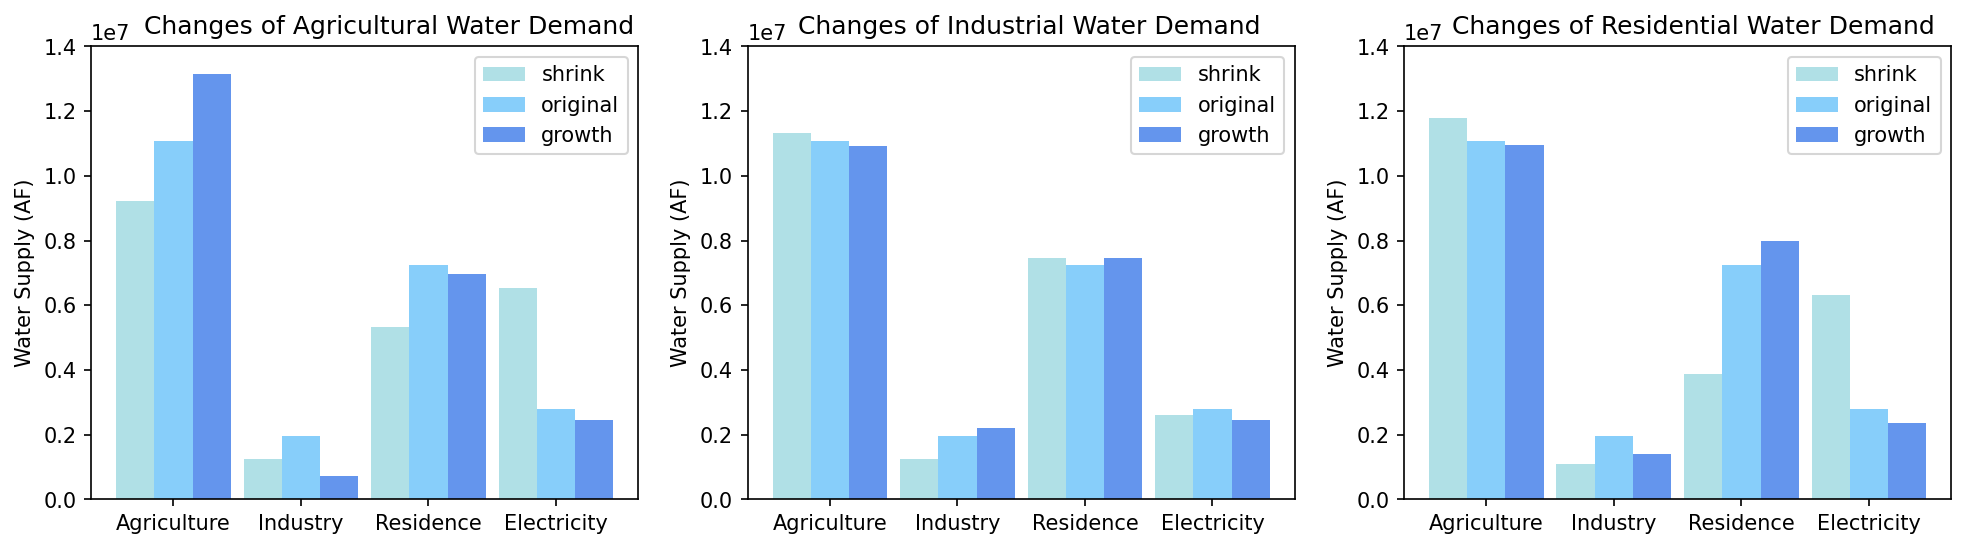

In [43]:
plt.figure(figsize=(16,4), dpi=150)

plt.subplot(131)
labels = ['Agriculture', 'Industry', 'Residence', 'Electricity']
original= df1['original']
shrink= df1['shrink']
growth= df1['growth']
 
x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars
 
# Figure 1
plt.bar(x - width, shrink, width, label='shrink',color='powderblue')
plt.bar(x, original, width, label='original',color='lightskyblue')
plt.bar(x + width, growth, width, label='growth',color='cornflowerblue')
plt.ylim(0, 1.4e+07)
 
# Add some text for labels, title and 
# custom x-axis tick labels, etc.
plt.ylabel('Water Supply (AF)')
plt.title('      Changes of Agricultural Water Demand')
plt.xticks( np.arange(4), ('Agriculture', 'Industry', 'Residence', 'Electricity') )
plt.legend()


plt.subplot(132)
labels = ['Agriculture', 'Industry', 'Residence', 'Electricity']
original= df2['original']
shrink= df2['shrink']
growth= df2['growth']
plt.ylim(0, 1.4e+07)
 
x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars
 

plt.bar(x - width, shrink, width, label='shrink',color='powderblue')
plt.bar(x, original, width, label='original',color='lightskyblue')
plt.bar(x + width, growth, width, label='growth',color='cornflowerblue')
 

plt.ylabel('Water Supply (AF)')
plt.title('  Changes of Industrial Water Demand')
plt.xticks( np.arange(4), ('Agriculture', 'Industry', 'Residence', 'Electricity') )
plt.legend()

plt.subplot(133)
labels = ['Agriculture', 'Industry', 'Residence', 'Electricity']
original= df3['original']
shrink= df3['shrink']
growth= df3['growth']
plt.ylim(0, 1.4e+07)
 
x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars
 

plt.bar(x - width, shrink, width, label='shrink',color='powderblue')
plt.bar(x, original, width, label='original',color='lightskyblue')
plt.bar(x + width, growth, width, label='growth',color='cornflowerblue')
 

plt.ylabel('Water Supply (AF)')
plt.title('    Changes of Residential Water Demand')
plt.xticks( np.arange(4), ('Agriculture', 'Industry', 'Residence', 'Electricity') )
plt.legend()
plt.savefig('Q4_1.png')

# q4.2

In [20]:
df4=pd.DataFrame()

In [21]:
a=(P-1.7)/132*24322000
b=(M-0.6)/121*26134000
temp=[]
from pymoo.core.problem import Problem
class MyProblem(Problem):
    def __init__(self):
        
        super().__init__(n_var=14,   
                         n_obj=3,  
                         n_constr=9,    
                         xl=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0]),     
                         xu=np.array([a,a,a,a,a,a,a,b,b,b,b,b,b,b]),  
                         )

    def _evaluate(self, x, out, *args, **kwargs):

        
        
        alpha=0.6
        belta=0.7
        f1 = -x[:, 0]*1250*2/3/6 - x[:, 1]*1250*1/3/6 - x[:, 2]*1629*2/3/3 -  x[:, 3]*1629*1/3/3-x[:, 4]*1303.4*2/3/2-x[:, 5]*1303.4*1/3/2-x[:, 6]*1250*1/3/6-x[:, 7]*1250*1/3/6-x[:, 8]*1629*1/3/3- x[:, 9]*1629*2/3/3-x[:, 10]*1303.4*1/3/2-x[:, 11]*1303.4*2/3/2-x[:, 12]*(0.3*P+12.5)*36-x[:, 13]*(0.3*M+12.8)*36
                #f2 = -(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7])/(4.97*10**7/365)-(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])/(2.65*10**6/365)-(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])/(9.61*10**6/365)
                #f3= -x[:, 12]*(0.3*P+12.5)/(10**6)-x[:, 13]*(0.3*M+12.8)/(10**6)
        f2 = -(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7]+x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9]+x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])/(4.97*10**7/365+2.65*10**6/365+9.61*10**6/365)-x[:, 13]/4109
        f3= -x[:, 12]*(0.3*P+12.5)*1.2*10**7-x[:, 13]*(0.3*M+12.8)*1.2*10**7+1.2*10**13
        f4= -2*(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])-6*(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])
       
        g1=-(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7])+(4.97*10**7/365*80)
        g8=-(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])+(2.65*10**6/365*80)
        g9=-(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])+(9.61*10**6/365*80)              
        g2 = -x[:, 12]*1.2*10**7*(0.3*P+12.5)-x[:, 13]*1.2*10**7*(0.3*M+12.8)+1.2*10**13*80
        g3 = x[:, 0]+x[:, 1]+x[:, 2]+x[:, 3]+x[:, 4]+x[:, 5]+x[:, 12]-(P-1.7)*1.8*10**5+0.24*10**7
        g4 = -x[:, 0]-x[:, 1]-x[:, 2]-x[:, 3]-x[:, 4]-x[:, 5]-x[:, 12]+(P-1.7)*1.8*10**5-2.4*10**7
        g5 = x[:, 6]+x[:, 7]+x[:, 8]+x[:, 9]+x[:, 10]+x[:, 11]+x[:, 13]+alpha*x[:, 12]-(M-0.6)*2.2*10**5+0.26*10**7
        g6 = -x[:, 6]-x[:, 7]-x[:, 8]-x[:, 9]-x[:, 10]-x[:, 11]-x[:, 13]-alpha*x[:, 12]+(M-0.6)*2.2*10**5-2.6*10**7
        g7 = -0.6*x[:, 13]+4.1*10**3*80
        
        out["F"] = np.column_stack([f1, f2,f3,f4])
        out["G"] = np.column_stack([g1, g2, g3, g4, g5, g6,g7,g8,g9])
        
res = minimize(MyProblem(),
    algorithm,
                seed=1,
                   termination=('n_gen', 1000))
answer=res.X[:1].squeeze().tolist()
answer=list(res.X[:1].squeeze())
print(answer)
temp.append(answer[0]+answer[1]+answer[6]+answer[7])
temp.append(answer[2]+answer[3]+answer[8]+answer[9])
temp.append(answer[4]+answer[5]+answer[10]+answer[11])
temp.append(answer[12]+answer[13])
df4['original']=temp

[3988126.588599565, 991622.3695795063, 180952.50216672313, 1422954.8684500104, 2642804.505366185, 668437.8108980652, 4294588.860522245, 1799288.7716875772, 92369.98147407196, 266643.6305800274, 2953178.7691057, 990999.2649051892, 347706.37715001963, 2448179.6752975034]


In [22]:
a=(P-1.7)/132*24322000
b=(M-0.6)/121*26134000
change=0.4
temp=[]
from pymoo.core.problem import Problem
class MyProblem(Problem):
    def __init__(self):
        
        super().__init__(n_var=14,   
                         n_obj=3,   
                         n_constr=9,   
                         xl=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0]),    
                         xu=np.array([a,a,a,a,a,a,a,b,b,b,b,b,b,b]),   
                         )

    def _evaluate(self, x, out, *args, **kwargs):

        
        
        alpha=0.6
        belta=0.7
        f1 = -x[:, 0]*1250*2/3/6 - x[:, 1]*1250*1/3/6 - x[:, 2]*1629*2/3/3 -  x[:, 3]*1629*1/3/3-x[:, 4]*1303.4*2/3/2-x[:, 5]*1303.4*1/3/2-x[:, 6]*1250*1/3/6-x[:, 7]*1250*1/3/6-x[:, 8]*1629*1/3/3- x[:, 9]*1629*2/3/3-x[:, 10]*1303.4*1/3/2-x[:, 11]*1303.4*2/3/2-x[:, 12]*(0.3*P+12.5)*36-x[:, 13]*(0.3*M+12.8)*36
                #f2 = -(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7])/(4.97*10**7/365)-(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])/(2.65*10**6/365)-(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])/(9.61*10**6/365)
                #f3= -x[:, 12]*(0.3*P+12.5)/(10**6)-x[:, 13]*(0.3*M+12.8)/(10**6)
        f2 = -(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7]+x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9]+x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])/(4.97*10**7/365+2.65*10**6/365+9.61*10**6/365)-x[:, 13]/4109
        f3= -x[:, 12]*(0.3*P+12.5)*1.2*10**7-x[:, 13]*(0.3*M+12.8)*1.2*10**7+1.2*10**13*change
        f4= -2*(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])-6*(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])
    
        g1=-(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7])+(4.97*10**7/365*80)
        g8=-(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])+(2.65*10**6/365*80)
        g9=-(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])+(9.61*10**6/365*80)              
        g2 = -x[:, 12]*1.2*10**7*(0.3*P+12.5)-x[:, 13]*1.2*10**7*(0.3*M+12.8)+1.2*10**13*80*change
        g3 = x[:, 0]+x[:, 1]+x[:, 2]+x[:, 3]+x[:, 4]+x[:, 5]+x[:, 12]-(P-1.7)*1.8*10**5+0.24*10**7
        g4 = -x[:, 0]-x[:, 1]-x[:, 2]-x[:, 3]-x[:, 4]-x[:, 5]-x[:, 12]+(P-1.7)*1.8*10**5-2.4*10**7
        g5 = x[:, 6]+x[:, 7]+x[:, 8]+x[:, 9]+x[:, 10]+x[:, 11]+x[:, 13]+alpha*x[:, 12]-(M-0.6)*2.2*10**5+0.26*10**7
        g6 = -x[:, 6]-x[:, 7]-x[:, 8]-x[:, 9]-x[:, 10]-x[:, 11]-x[:, 13]-alpha*x[:, 12]+(M-0.6)*2.2*10**5-2.6*10**7
        g7 = -0.6*x[:, 13]+4.1*10**3*80
        
        out["F"] = np.column_stack([f1, f2,f3,f4])
        out["G"] = np.column_stack([g1, g2, g3, g4, g5, g6,g7,g8,g9])
        
res = minimize(MyProblem(),
    algorithm,
                seed=1,
                   termination=('n_gen', 1000))
answer=res.X[:1].squeeze().tolist()
answer=list(res.X[:1].squeeze())
print(answer)
temp.append(answer[0]+answer[1]+answer[6]+answer[7])
temp.append(answer[2]+answer[3]+answer[8]+answer[9])
temp.append(answer[4]+answer[5]+answer[10]+answer[11])
temp.append(answer[12]+answer[13])
df4['renewable_40%']=temp

[1687783.811385578, 1536710.0557329608, 33237.65129791222, 2228462.808394132, 3487452.316283695, 1197108.7373026363, 2960284.5109383035, 4719832.085959274, 258932.81271519777, 124331.0471547149, 3435042.1792205167, 381480.2293824529, 20006.219270390528, 1164031.3781847542]


In [23]:
a=(P-1.7)/132*24322000
b=(M-0.6)/121*26134000
change=0.62
temp=[]
from pymoo.core.problem import Problem
class MyProblem(Problem):
    def __init__(self):
        
        super().__init__(n_var=14,   
                         n_obj=3,   
                         n_constr=9,    
                         xl=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0]),    
                         xu=np.array([a,a,a,a,a,a,a,b,b,b,b,b,b,b]),   
                         )

    def _evaluate(self, x, out, *args, **kwargs):

       
        
        alpha=0.6
        belta=0.7
        f1 = -x[:, 0]*1250*2/3/6 - x[:, 1]*1250*1/3/6 - x[:, 2]*1629*2/3/3 -  x[:, 3]*1629*1/3/3-x[:, 4]*1303.4*2/3/2-x[:, 5]*1303.4*1/3/2-x[:, 6]*1250*1/3/6-x[:, 7]*1250*1/3/6-x[:, 8]*1629*1/3/3- x[:, 9]*1629*2/3/3-x[:, 10]*1303.4*1/3/2-x[:, 11]*1303.4*2/3/2-x[:, 12]*(0.3*P+12.5)*36-x[:, 13]*(0.3*M+12.8)*36
                #f2 = -(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7])/(4.97*10**7/365)-(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])/(2.65*10**6/365)-(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])/(9.61*10**6/365)
                #f3= -x[:, 12]*(0.3*P+12.5)/(10**6)-x[:, 13]*(0.3*M+12.8)/(10**6)
        f2 = -(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7]+x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9]+x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])/(4.97*10**7/365+2.65*10**6/365+9.61*10**6/365)-x[:, 13]/4109
        f3= -x[:, 12]*(0.3*P+12.5)*1.2*10**7-x[:, 13]*(0.3*M+12.8)*1.2*10**7+1.2*10**13*change
        f4= -2*(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])-6*(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])
       
        g1=-(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7])+(4.97*10**7/365*80)
        g8=-(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])+(2.65*10**6/365*80)
        g9=-(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])+(9.61*10**6/365*80)              
        g2 = -x[:, 12]*1.2*10**7*(0.3*P+12.5)-x[:, 13]*1.2*10**7*(0.3*M+12.8)+1.2*10**13*80*change
        g3 = x[:, 0]+x[:, 1]+x[:, 2]+x[:, 3]+x[:, 4]+x[:, 5]+x[:, 12]-(P-1.7)*1.8*10**5+0.24*10**7
        g4 = -x[:, 0]-x[:, 1]-x[:, 2]-x[:, 3]-x[:, 4]-x[:, 5]-x[:, 12]+(P-1.7)*1.8*10**5-2.4*10**7
        g5 = x[:, 6]+x[:, 7]+x[:, 8]+x[:, 9]+x[:, 10]+x[:, 11]+x[:, 13]+alpha*x[:, 12]-(M-0.6)*2.2*10**5+0.26*10**7
        g6 = -x[:, 6]-x[:, 7]-x[:, 8]-x[:, 9]-x[:, 10]-x[:, 11]-x[:, 13]-alpha*x[:, 12]+(M-0.6)*2.2*10**5-2.6*10**7
        g7 = -0.6*x[:, 13]+4.1*10**3*80
        
        out["F"] = np.column_stack([f1, f2,f3,f4])
        out["G"] = np.column_stack([g1, g2, g3, g4, g5, g6,g7,g8,g9])
        
res = minimize(MyProblem(),
    algorithm,
                seed=1,
                   termination=('n_gen', 1000))
answer=res.X[:1].squeeze().tolist()
answer=list(res.X[:1].squeeze())
print(answer)
temp.append(answer[0]+answer[1]+answer[6]+answer[7])
temp.append(answer[2]+answer[3]+answer[8]+answer[9])
temp.append(answer[4]+answer[5]+answer[10]+answer[11])
temp.append(answer[12]+answer[13])
df4['renewable_62%']=temp

[1676618.5304164626, 1495960.2053179808, 43953.886131487496, 2518171.482444195, 2951268.880026575, 1094431.535450801, 2960795.5755304927, 4771141.2400266845, 41792.6801254812, 9265.560525388122, 2846683.618913429, 534240.0904368056, 312083.3518667792, 1705941.9755664463]


In [24]:
df4.index=['agriculture','industry','residence','electricity']
df4

,original,renewable_40%,renewable_62%
agriculture,1.107363e+07,1.090461e+07,1.090452e+07
industry,1.962921e+06,2.644964e+06,2.613184e+06
residence,7.255420e+06,8.501083e+06,7.426624e+06
electricity,2.795886e+06,1.184038e+06,2.018025e+06


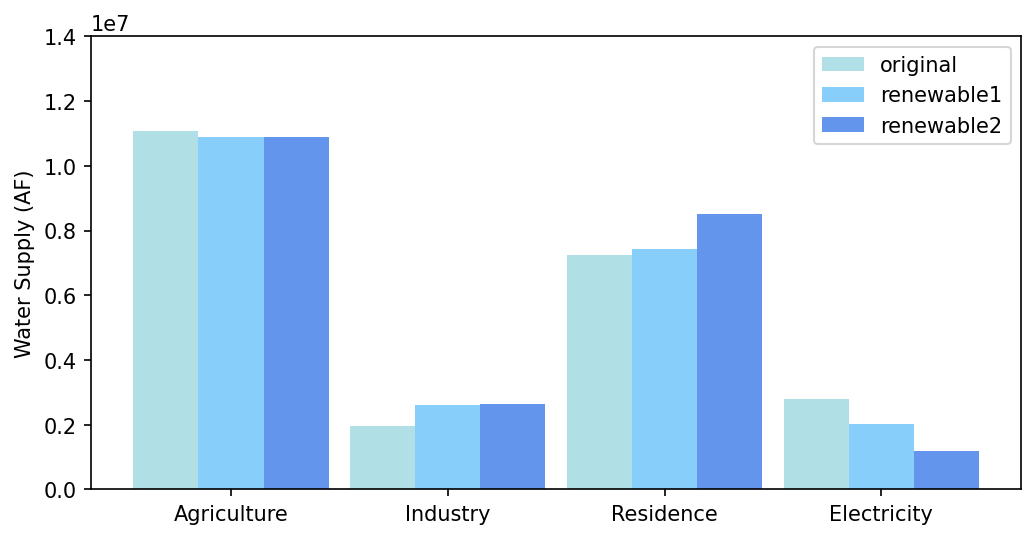

In [32]:
plt.figure(figsize=(8,4), dpi=150)

labels = ['Agriculture', 'Industry', 'Residence', 'Electricity']
original= df4['original']
renewable_1= df4['renewable_40%']
renewable_2= df4['renewable_62%']
 
x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars
 

plt.bar(x - width, original, width, label='original',color='powderblue')
plt.bar(x, renewable_2, width, label='renewable1',color='lightskyblue')
plt.bar(x + width, renewable_1, width, label='renewable2',color='cornflowerblue')
plt.ylim(0, 1.4e+07)

plt.ylabel('Water Supply (AF)')
plt.xticks( np.arange(4), ('Agriculture', 'Industry', 'Residence', 'Electricity') )
plt.legend()
plt.savefig('Q4_2.png')

# q4.3

In [26]:
df5=pd.DataFrame()

In [27]:
a=(P-1.7)/132*24322000
b=(M-0.6)/121*26134000
temp=[]
from pymoo.core.problem import Problem
class MyProblem(Problem):
    def __init__(self):
       
        super().__init__(n_var=14,   
                         n_obj=3,  
                         n_constr=9,    
                         xl=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0]),    
                         xu=np.array([a,a,a,a,a,a,a,b,b,b,b,b,b,b]),   
                         )

    def _evaluate(self, x, out, *args, **kwargs):

        
        
        alpha=0.6
        belta=0.7
        f1 = -x[:, 0]*1250*2/3/6 - x[:, 1]*1250*1/3/6 - x[:, 2]*1629*2/3/3 -  x[:, 3]*1629*1/3/3-x[:, 4]*1303.4*2/3/2-x[:, 5]*1303.4*1/3/2-x[:, 6]*1250*1/3/6-x[:, 7]*1250*1/3/6-x[:, 8]*1629*1/3/3- x[:, 9]*1629*2/3/3-x[:, 10]*1303.4*1/3/2-x[:, 11]*1303.4*2/3/2-x[:, 12]*(0.3*P+12.5)*36-x[:, 13]*(0.3*M+12.8)*36
                #f2 = -(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7])/(4.97*10**7/365)-(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])/(2.65*10**6/365)-(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])/(9.61*10**6/365)
                #f3= -x[:, 12]*(0.3*P+12.5)/(10**6)-x[:, 13]*(0.3*M+12.8)/(10**6)
        f2 = -(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7]+x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9]+x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])/(4.97*10**7/365+2.65*10**6/365+9.61*10**6/365)-x[:, 13]/4109
        f3= -x[:, 12]*(0.3*P+12.5)*1.2*10**7-x[:, 13]*(0.3*M+12.8)*1.2*10**7+1.2*10**13
        f4= -2*(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])-6*(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])
     
        g1=-(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7])+(4.97*10**7/365*80)
        g8=-(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])+(2.65*10**6/365*80)
        g9=-(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])+(9.61*10**6/365*80)              
        g2 = -x[:, 12]*1.2*10**7*(0.3*P+12.5)-x[:, 13]*1.2*10**7*(0.3*M+12.8)+1.2*10**13*80
        g3 = x[:, 0]+x[:, 1]+x[:, 2]+x[:, 3]+x[:, 4]+x[:, 5]+x[:, 12]-(P-1.7)*1.8*10**5+0.24*10**7
        g4 = -x[:, 0]-x[:, 1]-x[:, 2]-x[:, 3]-x[:, 4]-x[:, 5]-x[:, 12]+(P-1.7)*1.8*10**5-2.4*10**7
        g5 = x[:, 6]+x[:, 7]+x[:, 8]+x[:, 9]+x[:, 10]+x[:, 11]+x[:, 13]+alpha*x[:, 12]-(M-0.6)*2.2*10**5+0.26*10**7
        g6 = -x[:, 6]-x[:, 7]-x[:, 8]-x[:, 9]-x[:, 10]-x[:, 11]-x[:, 13]-alpha*x[:, 12]+(M-0.6)*2.2*10**5-2.6*10**7
        g7 = -0.6*x[:, 13]+4.1*10**3*80
       
        out["F"] = np.column_stack([f1, f2,f3,f4])
        out["G"] = np.column_stack([g1, g2, g3, g4, g5, g6,g7,g8,g9])
        
res = minimize(MyProblem(),
    algorithm,
                seed=1,
                   termination=('n_gen', 1000))
answer=res.X[:1].squeeze().tolist()
answer=list(res.X[:1].squeeze())
print(answer)
temp.append(answer[0]+answer[1]+answer[6]+answer[7])
temp.append(answer[2]+answer[3]+answer[8]+answer[9])
temp.append(answer[4]+answer[5]+answer[10]+answer[11])
temp.append(answer[12]+answer[13])
df5['original']=temp

[3988126.588599565, 991622.3695795063, 180952.50216672313, 1422954.8684500104, 2642804.505366185, 668437.8108980652, 4294588.860522245, 1799288.7716875772, 92369.98147407196, 266643.6305800274, 2953178.7691057, 990999.2649051892, 347706.37715001963, 2448179.6752975034]


In [28]:
a=(P-1.7)/132*24322000
b=(M-0.6)/121*26134000
change=0.7455
temp=[]
from pymoo.core.problem import Problem
class MyProblem(Problem):
    def __init__(self):
        
        super().__init__(n_var=14,  
                         n_obj=3,   
                         n_constr=9,    
                         xl=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0]),     
                         xu=np.array([a,a,a,a,a,a,a,b,b,b,b,b,b,b]),  
                         )

    def _evaluate(self, x, out, *args, **kwargs):

      
        alpha=0.6
        belta=0.7
        f1 = -x[:, 0]*1250*2/3/6 - x[:, 1]*1250*1/3/6 - x[:, 2]*1629*2/3/3 -  x[:, 3]*1629*1/3/3-x[:, 4]*1303.4*2/3/2-x[:, 5]*1303.4*1/3/2-x[:, 6]*1250*1/3/6-x[:, 7]*1250*1/3/6-x[:, 8]*1629*1/3/3- x[:, 9]*1629*2/3/3-x[:, 10]*1303.4*1/3/2-x[:, 11]*1303.4*2/3/2-x[:, 12]*(0.3*P+12.5)*36-x[:, 13]*(0.3*M+12.8)*36
                #f2 = -(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7])/(4.97*10**7/365)-(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])/(2.65*10**6/365)-(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])/(9.61*10**6/365)
                #f3= -x[:, 12]*(0.3*P+12.5)/(10**6)-x[:, 13]*(0.3*M+12.8)/(10**6)
        f2 = -(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7]+x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9]+x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])/(4.97*10**7*change/365+2.65*10**6*change/365+9.61*10**6*change/365)-x[:, 13]/4109
        f3= -x[:, 12]*(0.3*P+12.5)*1.2*10**7-x[:, 13]*(0.3*M+12.8)*1.2*10**7+1.2*10**13*change
        f4= -2*(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])-6*(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])
        
        g1=-(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7])+(4.97*10**7*change/365*80)
        g8=-(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])+(2.65*10**6*change/365*80)
        g9=-(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])+(9.61*10**6*change/365*80)              
        g2 = -x[:, 12]*1.2*10**7*(0.3*P+12.5)-x[:, 13]*1.2*10**7*(0.3*M+12.8)+1.2*10**13*80*change
        g3 = x[:, 0]+x[:, 1]+x[:, 2]+x[:, 3]+x[:, 4]+x[:, 5]+x[:, 12]-(P-1.7)*1.8*10**5+0.24*10**7
        g4 = -x[:, 0]-x[:, 1]-x[:, 2]-x[:, 3]-x[:, 4]-x[:, 5]-x[:, 12]+(P-1.7)*1.8*10**5-2.4*10**7
        g5 = x[:, 6]+x[:, 7]+x[:, 8]+x[:, 9]+x[:, 10]+x[:, 11]+x[:, 13]+alpha*x[:, 12]-(M-0.6)*2.2*10**5+0.26*10**7
        g6 = -x[:, 6]-x[:, 7]-x[:, 8]-x[:, 9]-x[:, 10]-x[:, 11]-x[:, 13]-alpha*x[:, 12]+(M-0.6)*2.2*10**5-2.6*10**7
        g7 = -0.6*x[:, 13]+4.1*10**3*80
        
        out["F"] = np.column_stack([f1, f2,f3,f4])
        out["G"] = np.column_stack([g1, g2, g3, g4, g5, g6,g7,g8,g9])
        
res = minimize(MyProblem(),
    algorithm,
                seed=1,
                   termination=('n_gen', 1000))
answer=res.X[:1].squeeze().tolist()
answer=list(res.X[:1].squeeze())
print(answer)
temp.append(answer[0]+answer[1]+answer[6]+answer[7])
temp.append(answer[2]+answer[3]+answer[8]+answer[9])
temp.append(answer[4]+answer[5]+answer[10]+answer[11])
temp.append(answer[12]+answer[13])
df5['shrink']=temp

[1153267.0542603573, 1870051.9562458687, 625407.2310682123, 2874761.297630604, 1503821.8293492408, 1998319.134854972, 2881360.6434160285, 2299642.536907886, 1767.2229349584522, 186850.80526745148, 2616366.3706816914, 3208577.5604925044, 217217.12159173714, 1686487.9218329107]


In [29]:
df5.index=['agriculture','industry','residence','electricity']
df5

,original,shrink
agriculture,1.107363e+07,8.204322e+06
industry,1.962921e+06,3.688787e+06
residence,7.255420e+06,9.327085e+06
electricity,2.795886e+06,1.903705e+06


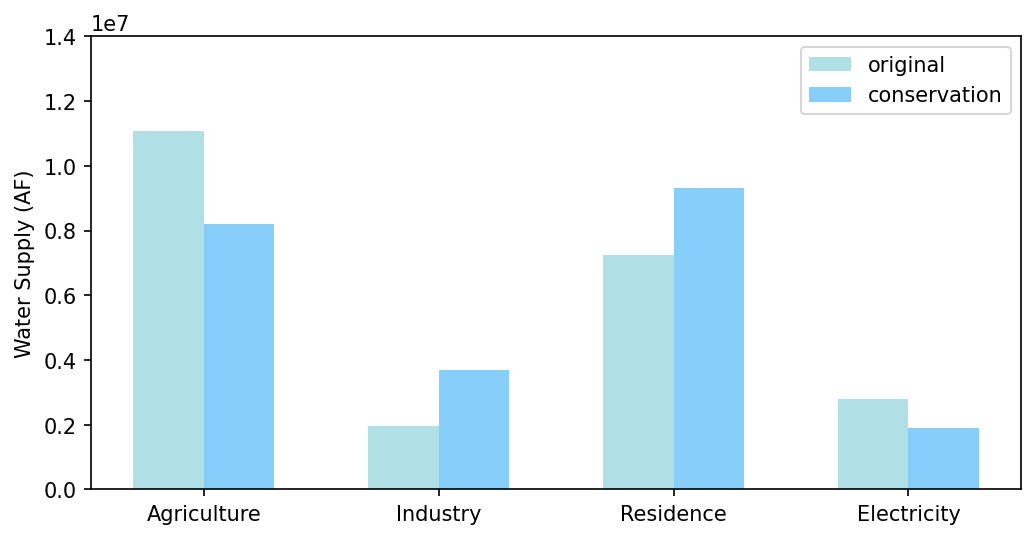

In [33]:
plt.figure(figsize=(8,4), dpi=150)

labels = ['Agriculture', 'Industry', 'Residence', 'Electricity']
original= df5['original']
shrink= df5['shrink']
 
x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars
 

plt.bar(x - 1/2*width, original, width, label='original',color='powderblue')
plt.bar(x+ 1/2*width, shrink, width, label='conservation',color='lightskyblue')
plt.ylim(0, 1.4e+07)
 

plt.ylabel('Water Supply (AF)')
plt.xticks( np.arange(4), ('Agriculture', 'Industry', 'Residence', 'Electricity') )
plt.legend()
plt.savefig('Q4_3.png')